# **Image2Image with Stable Diffusion**

###Welcome to the world of AI-powered image transformation! 🚀

In this notebook, we’ll leverage the **Stable Diffusion** model to perform **Image-to-Image (Img2Img)** transformations. This allows us to take any input image and creatively manipulate it based on a text description. We're using cutting-edge deep learning models, and with just a few lines of code, you can start experimenting with how your images can be reimagined by AI.

But first, we need to install some core libraries that are essential for running the model and handling the image processing pipeline. These libraries are the tools that will allow us to interact with the model, accelerate computations, and visualize the results. Let's get them set up and ready to roll.


In [1]:
# Install the necessary libraries
!pip install transformers diffusers torch
!pip install accelerate
!pip install matplotlib
!pip install huggingface_hub

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached nvidia_cublas_

---
Alright, let’s dive into the code. In the next cell, we’ll initialize the core components of the Stable Diffusion pipeline, which will allow us to generate high-quality, AI-powered images based on text prompts. Here's the breakdown:


**Loading the Stable Diffusion Model:** We’ll load the pre-trained Stable Diffusion 2.1 Base model from Hugging Face. This model is capable of generating high-fidelity images by conditioning on both input images and textual descriptions.


**Uploading Your Image:** We’ll define a function that lets you upload an image from your local machine. This image will be our starting point for transformations.


**Transformation Pipeline:** After setting up the image, we’ll define a function that uses the Stable Diffusion model to transform the image based on a user-defined prompt. The magic happens when the model combines the input image with the descriptive text, generating a new version that adheres to the specified concept.


**Let’s fire up the engine and get everything initialized!**

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Please upload an image from your local machine.


Saving nara-pic.png to nara-pic.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved as 'generated_from_image.png'


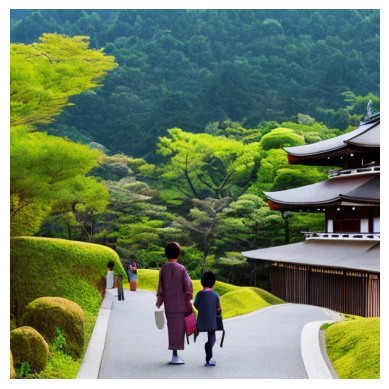

In [8]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load the pre-trained model (Stable Diffusion)
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                               torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Use GPU if available

# Function to upload and load an image from Google Colab
def upload_image():
    uploaded = files.upload()  # This allows you to upload an image
    for image_name in uploaded.keys():
        img = Image.open(image_name)
    return img

# Function for Image-to-Image (Img2Img)
def generate_image_from_input_image(prompt, input_image):
    # Preprocess the input image to fit the model (resize)
    input_image = input_image.resize((512, 512))  # Resize for the model
    image = pipe(prompt=prompt, init_image=input_image, strength=0.75).images[0]  # Adjust strength for creativity
    return image

# Upload image using the function
print("Please upload an image from your local machine.")
input_image = upload_image()  # Upload an image (this opens the file dialog in Colab)

# Define the prompt for the image transformation
prompt = "A serene landascape of the japan in Nara city, featuring a happy family"

# Generate the image based on the prompt and input image
generated_image = generate_image_from_input_image(prompt, input_image)

# Save the generated image
generated_image.save("generated_from_image.png")
print("Generated image saved as 'generated_from_image.png'")

# Display the generated image
plt.imshow(generated_image)
plt.axis("off")  # Hide axis
plt.show()

---
Boom, we're up and running. Here's the lowdown on how the code works and why it's so powerful:

##1. Libraries:##
**transformers**, **diffusers**, and **torch** are the libraries that make Stable Diffusion possible. These libraries handle everything from loading pre-trained models to running inference efficiently on your GPU.
accelerate optimizes the model's performance, ensuring that we're taking full advantage of GPU acceleration when available **(important for Colab users)**.
**matplotlib** is used for quick visualizations of the output, while huggingface_hub allows us to pull the model from Hugging Face’s repository.

##2. Stable Diffusion Model:##
The core of this notebook is the **Stable Diffusion 2.1 Base model**, a deep learning model fine-tuned for text-to-image generation. Here’s the breakdown of what happens when we load it:

**StableDiffusionPipeline.from_pretrained():** This method loads the pre-trained weights of the model. The model itself is based on a variant of the U-Net architecture, which is combined with a **Variational Autoencoder (VAE)** and a **CLIP model** to understand both the image and the text prompt.

**GPU Optimization:** The model is moved to the GPU using **.to("cuda")**, which speeds up the generation process significantly compared to CPU-based computations.

##3. Uploading Images:##
The **upload_image()** function is pretty straightforward — it allows you to upload an image file from your local machine into the notebook. We use the **files.upload()** function from Colab to trigger the file dialog, making it seamless to work with your own images. Once uploaded, the image is opened and ready to be processed.

##4. Image-to-Image Transformation:
Here’s where the real magic happens. The function **generate_image_from_input_image()** does the heavy lifting:

**Resizing:** First, the image is resized to **512x512 pixels**, the resolution that the model is optimized for. The resizing ensures that the model processes the image correctly without any distortion or mismatch.

**Diffusion Process:** The heart of the transformation is the denoising process applied by the Stable Diffusion model. It takes the input image and iteratively refines it based on the prompt you provide. The model applies latent noise and then gradually denoises it while steering the image toward the prompt’s description.

**Strength Parameter:** The **strength=0.75** controls how much influence the text prompt has on the final image. A value closer to 1 means the model will apply more of the prompt's influence, resulting in a more creative transformation. Lower values keep the input image more intact.
##5. Display and Save the Image:
Once the image is generated, it’s saved to disk as **generated_from_image.png** and displayed using matplotlib. The **plt.imshow()** command is used to render the image, and **plt.axis("off")** removes the axes for a clean output. You can download the generated image or share it as you like.

---

#Technical Breakdown:

**Model's Backbone:** The model uses a Latent Diffusion Model (LDM). Instead of operating directly on high-resolution images, it works in a lower-dimensional latent space, which makes the process more computationally efficient while still producing high-quality outputs.

**Noise Scheduling:** The model uses a technique known as noise scheduling to guide the image generation. The model first introduces noise into the image and then applies a denoising process. The strength of the denoising process (controlled by the prompt) determines how much the generated image deviates from the original input image.

**Prompt Engineering:** The way you craft your text prompt can have a huge impact on the result. You can experiment with different descriptors and watch how the model adapts the original image to match the prompt's details. For instance, try prompts like “Futuristic cityscape at sunset” or “Fantasy forest with glowing mushrooms” to see how creatively the model interprets those.

**Example Walkthrough:**
For example, if you upload an image and use the prompt "A serene landscape of Japan in Nara city, featuring a happy family", the model will take that input image and transform it to match the serenity of a Japanese landscape while incorporating the idea of a family enjoying the view. The model balances the input image and the text prompt to come up with something entirely new yet still grounded in the original.


---



#Conclusion
The power of AI is here, and with just a few lines of code, you can transform your images in ways that were once only possible in the realms of imagination. Push the boundaries with different prompts, tweak the settings, and experiment with various images. This notebook is your canvas—let’s create some AI-driven masterpieces!